In [1]:
using Plots

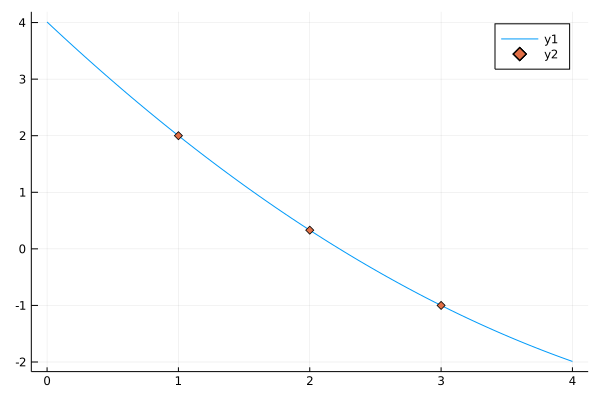

In [11]:
""" 
Evaluate the polynomial interpolant in Lagrange form.

xi is a vector of length n+1
fi are the values f(xi) for each point xi

x is the value where we compute
p(x)
which is the degree n+1 polynomial interpolating f at each point xi

The values xi must be distinct

Note that x can be a matrix or vector
"""
function lagrange_interp(x, xi, fi)
    f = zeros(size(x))
    for i=1:length(fi)
        elli = ones(size(x))
        for j=1:length(xi)
            if i==j continue; end
            elli = elli.*(x .- xi[j])/(xi[i] - xi[j])
        end
        f = f + fi[i]*elli
    end
    return f
end

# The polynomial
fi = [2,.33,-1];
xi = [1,2,3];
xx = collect(range(0,stop=4,length=100))

plot(xx,lagrange_interp(xx,xi,fi))
scatter!(xi,fi,marker=:diamond)    

In [13]:
lagrange_interp([2],xi,fi)

1-element Array{Float64,1}:
 3.0

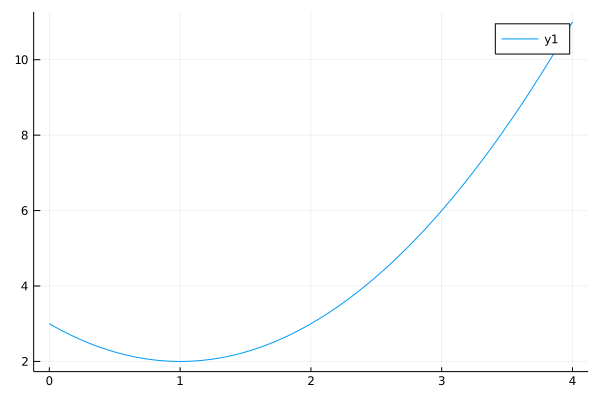

In [17]:
function compute_barycentric_weights(xi)
    ws = zeros(size(xi))
    for i=1:length(xi)
        w = 1
  # TODO, add check if x == xi, and just return fi in that case. 
        for j=1:length(xi)
            if j==i continue; end
            w = w*1 ./ (xi[i] - xi[j]);
        end
        ws[i] = w;
    end
    return ws
end  

function barycentric_interp_with_weights(x,xi,fi,wi)
    fnumer = zeros(size(x))
    fdenom = zeros(size(x))
    for i=1:length(xi)
        fnumer += fi[i] .* wi[i] ./ (x .- xi[i])
        fdenom += wi[i] ./ (x .- xi[i])
    end
    f = fnumer./fdenom
end

function barycentric_interp(x,xi,fi)
    return barycentric_interp_with_weights(x,xi,fi,compute_barycentric_weights(xi))
end

# The polynomial
fi = [2,3,6];
xi = [1,2,3];
xx = collect(range(0,stop=4,length=100));

plot(xx,barycentric_interp(xx,xi,fi))

In [16]:
barycentric_interp([nextfloat(2.0)],xi,fi)

1-element Array{Float64,1}:
 3.000000000000001

In [12]:
# show Trefethen's demo
fun(x) = abs.(x) + .5 .* x- x.^2;
n = 10
xi = cos.(pi .* (0:n)./n);
fi = fun(xi)
xx = range(-1,stop=1,length=5000)
plot(xx,barycentric_interp(xx,xi,fi))
scatter!(xi,fi)

LoadError: UndefVarError: barycentric_interp not defined

In [15]:
using Blink,Interact

HTML{String}("<script>\n// Immediately-invoked-function-expression to avoid global variables.\n(function() {\n    var warning_div = document.getElementById(\"webio-warning-2342329641342985019\");\n    var hide = function () {\n        var script = document.getElementById(\"webio-setup-371536494247560859\");\n        var parent = script && script.parentElement;\n        var grandparent = parent && parent.parentElement;\n        if (grandparent) {\n            grandparent.style.display = \"none\";\n        }\n        warning_div.style.display = \"none\";\n    };\n    if (typeof Jupyter !== \"undefined\") {\n        console.log(\"WebIO detected Jupyter notebook environment.\");\n        // Jupyter notebook.\n        var extensions = (\n            Jupyter\n            && Jupyter.notebook.config.data\n            && Jupyter.notebook.config.data.load_extensions\n        );\n        if (extensions && extensions[\"webio-jupyter-notebook\"]) {\n            // Extension already loaded.\n            console.log(\"Jupyter WebIO nbextension detected; not loading ad-hoc.\");\n            hide();\n            return;\n        }\n    } else if (window.location.pathname.includes(\"/lab\")) {\n        // Guessing JupyterLa\n        console.log(\"Jupyter Lab detected; make sure the @webio/jupyter-lab-provider labextension is installed.\");\n        hide();\n        return;\n    }\n})();\n\n</script>\n<p\n    id=\"webio-warning-2342329641342985019\"\n    class=\"output_text output_stderr\"\n    style=\"padding: 1em; font-weight: bold;\"\n>\n    Unable to load WebIO. Please make sure WebIO works for your Jupyter client.\n    For troubleshooting, please see <a href=\"https://juliagizmos.github.io/WebIO.jl/latest/providers/ijulia/\">\n    the WebIO/IJulia documentation</a>.\n    <!-- TODO: link to installation docs. -->\n</p>\n")

In [19]:
fun(x) = abs.(x) + .5 .* x- x.^2;

ui = @manipulate for n=10:10:1000
    xi = cos.(pi*(0:n)/n);
    fi = fun(xi)
    xx = collect(range(-1,stop=1,length=5000))
    plot(xx,barycentric_interp(xx,xi,fi))
    plot!(xi,fi,seriestype = :scatter,markersize=1.)
end

w = Window()
body!(w, ui)

Page(2, WebSocket(server, CONNECTED), Dict{String,Any}("webio" => Blink.AtomShell.var"#24#25"{Blink.AtomShell.WebIOBlinkComm}(Blink.AtomShell.WebIOBlinkComm(Window(2, Electron(Process(`/Users/dgleich/.julia/packages/Blink/u1xcH/deps/Julia.app/Contents/MacOS/Julia /Users/dgleich/.julia/packages/Blink/u1xcH/src/AtomShell/main.js port 8297`, ProcessRunning), Sockets.TCPSocket(RawFD(0x0000003a) active, 0 bytes waiting), Dict{String,Any}("callback" => Blink.var"#1#2"())), Page(#= circular reference @-5 =#), Task (done) @0x00000001103bcd90))),"callback" => Blink.var"#1#2"()), Distributed.Future(1, 1, 2, Some(true)))

┌ Error: An exception occurred while trying to send a WebIO message to a frontend:
│   exception = (Base.IOError("stream is closed or unusable", 0), Union{Ptr{Nothing}, Base.InterpreterIP}[Ptr{Nothing} @0x000000010760dc9d, Ptr{Nothing} @0x0000000107c0f8ce, Ptr{Nothing} @0x00000001076154a3, Ptr{Nothing} @0x0000000149979489, Ptr{Nothing} @0x0000000149979691, Ptr{Nothing} @0x00000001499796c3, Ptr{Nothing} @0x00000001499b91bb, Ptr{Nothing} @0x00000001499b938a, Ptr{Nothing} @0x00000001499b70a7, Ptr{Nothing} @0x00000001499b7a66, Ptr{Nothing} @0x00000001499b7fb4, Ptr{Nothing} @0x00000001499b7fcc, Ptr{Nothing} @0x00000001008bc4aa])
└ @ WebIO /Users/dgleich/.julia/packages/WebIO/nTMDV/src/connection.jl:120


In [18]:
fun(x) = abs.(x) + .5 .* x- x.^2;

ui2 = @manipulate for n=5:5:50
    xi = collect(-1.:(2/n):1.)
    fi = fun(xi)
    xx = collect(range(-1,stop=1,length=5000))
    plot(xx,barycentric_interp(xx,xi,fi))
    plot!(xi,fi,seriestype = :scatter,markersize=1.)
    ylims!(-1.,1.)
end

w2 = Window()
body!(w2, ui2)


Page(1, WebSocket(server, CONNECTED), Dict{String,Any}("webio" => Blink.AtomShell.var"#24#25"{Blink.AtomShell.WebIOBlinkComm}(Blink.AtomShell.WebIOBlinkComm(Window(1, Electron(Process(`/Users/dgleich/.julia/packages/Blink/u1xcH/deps/Julia.app/Contents/MacOS/Julia /Users/dgleich/.julia/packages/Blink/u1xcH/src/AtomShell/main.js port 8297`, ProcessRunning), Sockets.TCPSocket(RawFD(0x0000003a) active, 0 bytes waiting), Dict{String,Any}("callback" => Blink.var"#1#2"())), Page(#= circular reference @-5 =#), Task (done) @0x000000012a529210))),"callback" => Blink.var"#1#2"()), Distributed.Future(1, 1, 1, Some(true)))